#this is the complete line3 scaled dataset training and testing
#with plots of the GT masks, predicted masks, metrics by training.

In [1]:
# Setup: paths and environment
author = "cluster run"
import os, sys, subprocess, json, shlex, pathlib

REPO_ROOT = pathlib.Path("/gpfs/data/shohamlab/nicole/code/SUNS_nicole").resolve()
assert REPO_ROOT.exists(), f"Repo not found: {REPO_ROOT}"

# Ensure suns package is importable
if str(REPO_ROOT) not in sys.path:
    sys.path.insert(0, str(REPO_ROOT))

# Optional: pin TF backend for Keras consistency like scripts do
os.environ.setdefault('KERAS_BACKEND', 'tensorflow')

# Show active config
from suns import config as suns_config
print("ACTIVE_EXP_SET:", suns_config.ACTIVE_EXP_SET)
print("DATAFOLDER_SETS[ACTIVE_EXP_SET]:", suns_config.DATAFOLDER_SETS[suns_config.ACTIVE_EXP_SET])
print("EXP_ID_SETS[ACTIVE_EXP_SET]:", suns_config.EXP_ID_SETS[suns_config.ACTIVE_EXP_SET])

# Helper to run a script inside repo with same environment (streaming output)

def run_repo_script(rel_path, args=None, env=None):
    script_path = REPO_ROOT / rel_path
    assert script_path.exists(), f"Script not found: {script_path}"
    cmd = [sys.executable, "-u", str(script_path)] + (args or [])  # -u for unbuffered
    env_vars = os.environ.copy()
    env_vars.setdefault('PYTHONUNBUFFERED', '1')
    if env:
        env_vars.update(env)
    print("Running:", shlex.join(cmd))
    with subprocess.Popen(
        cmd,
        cwd=str(script_path.parent),
        env=env_vars,
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        bufsize=1,
        text=True,
    ) as proc:
        try:
            for line in proc.stdout:
                print(line, end="")
        finally:
            rc = proc.wait()
    print("Return code:", rc)
    if rc != 0:
        raise RuntimeError(f"Script failed: {script_path}")
    return rc


importing config
ACTIVE_EXP_SET: mouse7_new
DATAFOLDER_SETS[ACTIVE_EXP_SET]: /gpfs/home/bizzin01/nicole/code/SUNS_nicole/demo/mouse7_new
EXP_ID_SETS[ACTIVE_EXP_SET]: ['mouse7_773', 'mouse7_774', 'mouse7_775', 'mouse7_776']


In [3]:
# Ensure PYTHONPATH includes repo root for subprocess imports
import os
pp = os.environ.get('PYTHONPATH','')
rp = str(REPO_ROOT)
if not pp.startswith(rp):
    os.environ['PYTHONPATH'] = (rp + ((':' + pp) if pp else ''))
print('PYTHONPATH set. First entry:', os.environ['PYTHONPATH'].split(':')[0])


PYTHONPATH set. First entry: /gpfs/data/shohamlab/nicole/code/SUNS_nicole


In [4]:
# Debug: inspect GT Masks and run with verbose output
import os, glob, shlex, subprocess, sys

# Locate GT Masks dir and list files
base = suns_config.DATAFOLDER_SETS[suns_config.ACTIVE_EXP_SET]
dir_masks = os.path.join(base, 'GT Masks')
print('GT Masks dir:', dir_masks)
print('Exists:', os.path.exists(dir_masks), 'Writable:', os.access(dir_masks, os.W_OK))
files = sorted(glob.glob(os.path.join(dir_masks, '*FinalMasks*.mat')))
print('Matched FinalMasks files:', len(files))
for f in files:
    print(' -', os.path.basename(f))

# Verbose runner
def run_repo_script_verbose(rel_path, args=None, env=None):
    script_path = REPO_ROOT / rel_path
    assert script_path.exists(), f"Script not found: {script_path}"
    cmd = [sys.executable, str(script_path)] + (args or [])
    env_vars = os.environ.copy()
    if env:
        env_vars.update(env)
    print('Running:', shlex.join(cmd))
    proc = subprocess.run(cmd, cwd=str(script_path.parent), env=env_vars,
                          capture_output=True, text=True)
    print('Return code:', proc.returncode)
    if proc.stdout:
        print('--- STDOUT ---')
        print(proc.stdout)
    if proc.stderr:
        print('--- STDERR ---')
        print(proc.stderr)
    if proc.returncode != 0:
        raise RuntimeError(f"Script failed: {script_path}")
    return proc.returncode

# Re-run generate_sparse_GT with verbose output
run_repo_script_verbose("demo/train_3_test_1/generate_sparse_GT.py")


GT Masks dir: /gpfs/home/bizzin01/nicole/code/SUNS_nicole/demo/only_mouse7/GT Masks
Exists: True Writable: True
Matched FinalMasks files: 32
 - FinalMasks_mouse7.mat
 - FinalMasks_mouse7_773.mat
 - FinalMasks_mouse7_773_sparse.mat
 - FinalMasks_mouse7_774.mat
 - FinalMasks_mouse7_774_sparse.mat
 - FinalMasks_mouse7_775.mat
 - FinalMasks_mouse7_775_sparse.mat
 - FinalMasks_mouse7_776.mat
 - FinalMasks_mouse7_776_sparse.mat
 - FinalMasks_mouse7_777.mat
 - FinalMasks_mouse7_777_sparse.mat
 - FinalMasks_mouse7_778.mat
 - FinalMasks_mouse7_778_sparse.mat
 - FinalMasks_mouse7_779.mat
 - FinalMasks_mouse7_779_sparse.mat
 - FinalMasks_mouse7_780.mat
 - FinalMasks_mouse7_780_sparse.mat
 - FinalMasks_mouse7_781.mat
 - FinalMasks_mouse7_781_sparse.mat
 - FinalMasks_mouse7_782.mat
 - FinalMasks_mouse7_782_sparse.mat
 - FinalMasks_mouse7_783.mat
 - FinalMasks_mouse7_783_sparse.mat
 - FinalMasks_mouse7_784.mat
 - FinalMasks_mouse7_784_sparse.mat
 - FinalMasks_mouse7_785.mat
 - FinalMasks_mouse7_785_

Return code: 0
--- STDOUT ---
importing config
FinalMasks_mouse7_780.mat
FinalMasks_mouse7_784.mat
FinalMasks_mouse7_783.mat
FinalMasks_mouse7_773.mat
FinalMasks_mouse7_782.mat
FinalMasks_mouse7_785.mat
FinalMasks_mouse7_778.mat
FinalMasks_mouse7_779.mat
FinalMasks_mouse7_775.mat
FinalMasks_mouse7_777.mat
FinalMasks_mouse7_776.mat
FinalMasks_mouse7_786.mat
FinalMasks_mouse7_774.mat
FinalMasks_mouse7.mat
FinalMasks_mouse7_787.mat
FinalMasks_mouse7_781.mat



0

In [3]:
# Run 1: generate_sparse_GT.py
# Creates sparse GT .mat files from dense FinalMasks .mat files
run_repo_script("demo/train_all_test_all/generate_sparse_GT.py")


Running: /gpfs/home/bizzin01/.conda/envs/tensorflow-2.12/bin/python -u /gpfs/data/shohamlab/nicole/code/SUNS_nicole/demo/train_all_test_all/generate_sparse_GT.py
importing config
FinalMasks_mouse12.mat
FinalMasks_mouse5.mat
FinalMasks_mouse10.mat
FinalMasks_mouse14.mat
FinalMasks_mouse13.mat
FinalMasks_mouse7.mat
FinalMasks_mouse3.mat
FinalMasks_mouse9.mat
FinalMasks_mouse6.mat
FinalMasks_mouse1.mat
Return code: 0


0

Found 10 sparse GT files in /gpfs/data/shohamlab/nicole/code/SUNS_nicole/demo/line3_scaled/GT Masks


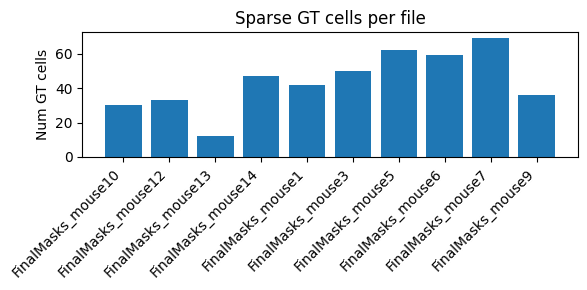

Total GT cells: 440


In [4]:
# Plot: summary of sparse GT masks
import os, glob
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

base = suns_config.DATAFOLDER_SETS[suns_config.ACTIVE_EXP_SET]
dir_masks = os.path.join(base, 'GT Masks')
files = sorted(glob.glob(os.path.join(dir_masks, '*_sparse.mat')))
print(f'Found {len(files)} sparse GT files in {dir_masks}')
names = []
counts = []
for f in files:
    try:
        m = loadmat(f)
        M = m['GTMasks_2']
        counts.append(M.shape[1])
        names.append(os.path.basename(f))
    except Exception as e:
        print('Error loading', f, e)

if counts:
    plt.figure(figsize=(max(6, len(counts) * 0.6), 3))
    xs = np.arange(len(counts))
    plt.bar(xs, counts)
    plt.xticks(xs, [n.replace('_sparse.mat', '') for n in names], rotation=45, ha='right')
    plt.ylabel('Num GT cells')
    plt.title('Sparse GT cells per file')
    plt.tight_layout()
    plt.show()
    print('Total GT cells:', int(np.sum(counts)))


## Max projection of videos with GT mask overlays
Use the controls below to select a video and visualize its frame-wise maximum projection together with the corresponding ground-truth masks. The mask outlines are drawn over the max-projection for quick sanity checks of alignment and coverage.


In [5]:
# Fix GT masks in scaled dataset: remove empty 120x88 masks and rewrite dense+sparse
import os, glob, numpy as np, h5py
from scipy.io import loadmat, savemat
from scipy.sparse import csc_matrix

GT_DIR = "/gpfs/data/shohamlab/nicole/code/SUNS_nicole/demo/line3_scaled/GT Masks"
H, W = 120, 88

def load_dense_masks_to_nhw(path: str) -> np.ndarray:
    # Return boolean (n, H, W) from FinalMasks (any of (H,W,n), (n,H,W), (H,n,W))
    arr = None
    try:
        with h5py.File(path, "r") as f:
            if "FinalMasks" in f:
                arr = np.array(f["FinalMasks"])
    except OSError:
        pass
    if arr is None:
        md = loadmat(path)
        arr = np.array(md["FinalMasks"])
    if arr.ndim != 3:
        raise RuntimeError(f"FinalMasks not 3D in {path}: {arr.shape}")
    d0, d1, d2 = arr.shape
    if (d0, d1) == (H, W):        nhw = np.transpose(arr, (2, 0, 1))
    elif (d1, d2) == (H, W):      nhw = arr
    elif (d0, d2) == (H, W):      nhw = np.transpose(arr, (1, 0, 2))
    else:
        sizes = [d0, d1, d2]
        n_axis = next((i for i, s in enumerate(sizes) if s not in (H, W)), int(np.argmax(sizes)))
        order = [n_axis] + [i for i in range(3) if i != n_axis]
        nhw = np.transpose(arr, order)
    return nhw.astype(bool)

report = []
for dense_path in sorted(glob.glob(os.path.join(GT_DIR, "FinalMasks_*.mat"))):
    if dense_path.endswith("_sparse.mat"):
        continue
    name = os.path.basename(dense_path)
    nhw = load_dense_masks_to_nhw(dense_path)                  # (n, H, W)
    n_total = nhw.shape[0]
    keep = nhw.reshape(n_total, -1).any(axis=1)                # non-empty masks
    nhw_kept = nhw[keep]
    n_kept = nhw_kept.shape[0]

    # Overwrite dense as (H, W, n)
    dense_out = np.transpose(nhw_kept.astype(np.uint8), (1, 2, 0))
    savemat(dense_path, {"FinalMasks": dense_out}, do_compression=True)

    # Overwrite sparse as GTMasks_2 (pixels, n)
    flat_kept = nhw_kept.reshape(n_kept, H * W).T
    GT_sparse = csc_matrix(flat_kept.astype(np.uint8))
    sparse_path = dense_path.replace(".mat", "_sparse.mat")
    savemat(sparse_path, {"GTMasks_2": GT_sparse}, do_compression=True)

    report.append((name, n_total, int(keep.sum())))
    print(f"{name}: kept {int(keep.sum())}/{n_total} → updated dense + sparse")

print("\nSummary:")
for name, n_total, n_kept in report:
    print(f" - {name}: {n_kept}/{n_total} kept")

FinalMasks_mouse1.mat: kept 42/42 → updated dense + sparse
FinalMasks_mouse10.mat: kept 30/30 → updated dense + sparse
FinalMasks_mouse12.mat: kept 33/33 → updated dense + sparse
FinalMasks_mouse13.mat: kept 12/12 → updated dense + sparse
FinalMasks_mouse14.mat: kept 47/47 → updated dense + sparse
FinalMasks_mouse3.mat: kept 50/50 → updated dense + sparse
FinalMasks_mouse5.mat: kept 62/62 → updated dense + sparse
FinalMasks_mouse6.mat: kept 59/59 → updated dense + sparse
FinalMasks_mouse7.mat: kept 69/69 → updated dense + sparse
FinalMasks_mouse9.mat: kept 36/36 → updated dense + sparse

Summary:
 - FinalMasks_mouse1.mat: 42/42 kept
 - FinalMasks_mouse10.mat: 30/30 kept
 - FinalMasks_mouse12.mat: 33/33 kept
 - FinalMasks_mouse13.mat: 12/12 kept
 - FinalMasks_mouse14.mat: 47/47 kept
 - FinalMasks_mouse3.mat: 50/50 kept
 - FinalMasks_mouse5.mat: 62/62 kept
 - FinalMasks_mouse6.mat: 59/59 kept
 - FinalMasks_mouse7.mat: 69/69 kept
 - FinalMasks_mouse9.mat: 36/36 kept


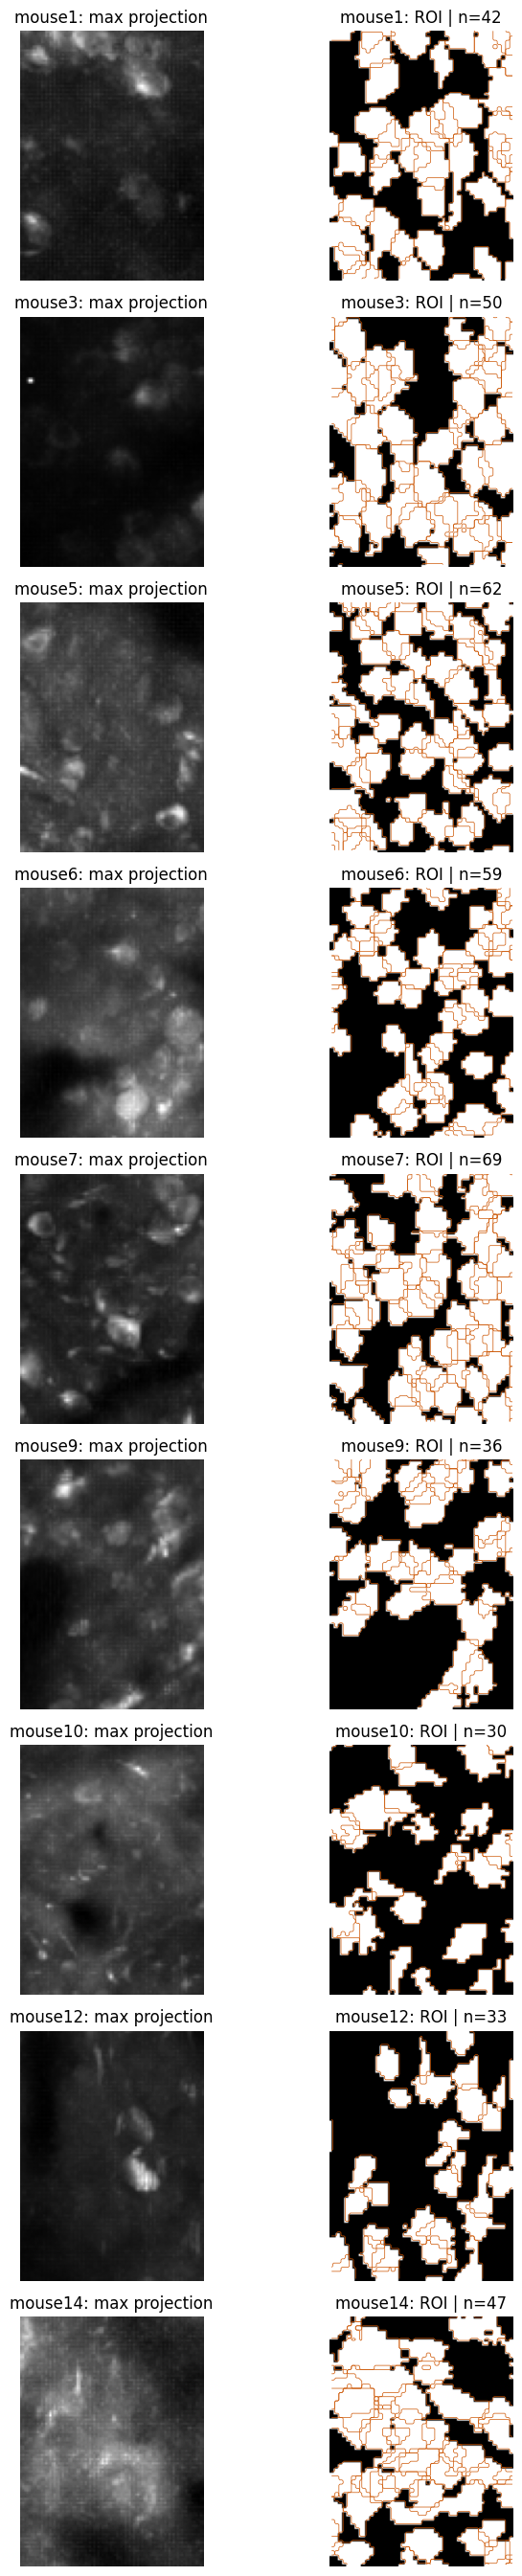

In [6]:
# Static grid visualization matching demo/line3_dataset/visualize_line3_maxproj_and_roi.ipynb
import os, glob, h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Resolve dataset roots
base = suns_config.DATAFOLDER_SETS[suns_config.ACTIVE_EXP_SET]
mask_dir = os.path.join(base, 'GT Masks')
mice = suns_config.EXP_ID_SETS[suns_config.ACTIVE_EXP_SET]

# Max projection helper (streaming), returns (120, 88)
_max_cache = {}

def get_max_projection(h5_path: str) -> np.ndarray:
    if h5_path in _max_cache:
        return _max_cache[h5_path]
    with h5py.File(h5_path, 'r') as hf:
        data = hf['mov']  # (T, H, W) expected (T, 120, 88)
        max_proj = None
        chunk = 500
        nframes = data.shape[0]
        for start in range(0, nframes, chunk):
            end = min(start + chunk, nframes)
            block = data[start:end]
            block_max = np.max(block, axis=0)
            max_proj = block_max if max_proj is None else np.maximum(max_proj, block_max)
    _max_cache[h5_path] = max_proj
    return max_proj

# Dense mask loader normalized to (n, 120, 88)

def load_dense_masks(mask_path: str) -> np.ndarray:
    try:
        with h5py.File(mask_path, 'r') as f:
            arr = np.array(f['FinalMasks'])
    except OSError:
        m = loadmat(mask_path)
        arr = np.array(m['FinalMasks'])
    if arr.ndim != 3:
        raise ValueError(f"FinalMasks has ndim={arr.ndim}, expected 3 in {mask_path}")
    d0, d1, d2 = arr.shape
    dims = [d0, d1, d2]
    n_axis = next((i for i, d in enumerate(dims) if d not in (88, 120)), int(np.argmax(dims)))
    if n_axis == 0:
        masks = arr
    elif n_axis == 1:
        masks = np.transpose(arr, (1, 0, 2))
    else:
        masks = np.transpose(arr, (2, 0, 1))
    masks = masks.astype(bool)
    if masks.shape[1:] == (88, 120):
        masks = np.transpose(masks, (0, 2, 1))
    return masks

# Map mouse -> video path (prefer base/<mouse>.h5 with recursive fallback)
video_paths = {}
for mouse in mice:
    candidate = os.path.join(base, f"{mouse}.h5")
    if os.path.exists(candidate):
        video_paths[mouse] = candidate
    else:
        found = sorted(glob.glob(os.path.join(base, '**', f'{mouse}.h5'), recursive=True))
        video_paths[mouse] = found[0] if found else None

ncols = 2
nrows = len(mice)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 3*nrows))
if nrows == 1:
    axes = np.array([axes])

# Helpers that mirror the demo notebook behavior

def union_mask(rois_n_hw: np.ndarray) -> np.ndarray:
    if rois_n_hw.size == 0:
        return None
    return np.any(rois_n_hw, axis=0)

def count_nonempty_rois(rois_n_hw: np.ndarray) -> int:
    if rois_n_hw.size == 0:
        return 0
    n = rois_n_hw.shape[0]
    flat_any = rois_n_hw.reshape(n, -1).any(axis=1)
    return int(np.count_nonzero(flat_any))

for idx, mouse in enumerate(mice):
    ax0, ax1 = axes[idx]

    # Max projection (grayscale)
    vpath = video_paths.get(mouse)
    if vpath and os.path.exists(vpath):
        mp = get_max_projection(vpath)
        ax0.imshow(mp, cmap='gray', origin='lower')
        ax0.set_title(f'{mouse}: max projection')
    else:
        ax0.text(0.5, 0.5, f'No video for {mouse}', ha='center', va='center')
    ax0.axis('off')

    # ROI masks (binary black/white) + per-ROI contours (dark orange)
    roi_path = os.path.join(mask_dir, f'FinalMasks_{mouse}.mat')
    if os.path.exists(roi_path):
        rois = load_dense_masks(roi_path)  # (n, 120, 88)
        mask_union = union_mask(rois)      # (120, 88)
        if mask_union is not None:
            ax1.imshow(mask_union.astype(np.float32), cmap='gray', vmin=0, vmax=1, origin='lower')
            n_valid = count_nonempty_rois(rois)
            for i in range(rois.shape[0]):
                if rois[i].any():
                    ax1.contour(
                        rois[i].astype(float),
                        levels=[0.5],
                        colors=[(0.8, 0.33, 0.0)],  # dark orange RGB
                        linewidths=0.5,
                        origin='lower'
                    )
            ax1.set_title(f'{mouse}: ROI | n={n_valid}')
        else:
            ax1.set_title(f'{mouse}: ROI | n=0')
    else:
        ax1.text(0.5, 0.5, f'No ROI for {mouse}', ha='center', va='center')
        ax1.set_title(f'{mouse}: ROI | n=0')
    ax1.axis('off')

plt.tight_layout()
plt.show()


In [8]:
# Run 2: demo_train_CNN_params.py
# Trains the CNN and runs parameter optimization. This can be long-running.
# You can optionally set CUDA_VISIBLE_DEVICES here to pick a GPU, or -1 for CPU.
# Example to force CPU: env={"CUDA_VISIBLE_DEVICES": "-1"}
run_repo_script_verbose(
    "demo/train_all_test_all/demo_train_CNN_params.py"
    )


NameError: name 'run_repo_script_verbose' is not defined

In [9]:
# Inspect GT mask shapes in the scaled dataset folder
import os, glob, h5py, numpy as np
from scipy.io import loadmat
from scipy.sparse import csc_matrix, issparse

gt_dir = "/gpfs/data/shohamlab/nicole/code/SUNS_nicole/demo/line3_scaled/GT Masks"

def load_dense_shape(path):
    # Try HDF5 (-v7.3) first
    try:
        with h5py.File(path, 'r') as f:
            if 'FinalMasks' in f:
                s = tuple(f['FinalMasks'].shape)  # (Ly, Lx, n) usually
                return s, 'h5'
    except OSError:
        pass
    # Fallback MATLAB v7
    md = loadmat(path)
    if 'FinalMasks' in md:
        arr = np.array(md['FinalMasks'])
        return arr.shape, 'mat'
    return None, 'unknown'

def interpret_dense_shape(shape):
    # Report how to view as (n, 120, 88)
    if shape is None or len(shape) != 3:
        return "not a 3D dense FinalMasks"
    d0, d1, d2 = shape
    dims = [d0, d1, d2]
    # Find n dimension as the one not equal to 88 or 120
    n_axis = next((i for i, d in enumerate(dims) if d not in (88, 120)), int(np.argmax(dims)))
    if n_axis == 0:
        return f"(n, Ly, Lx)=({d0}, {d1}, {d2}) → as (n, 120, 88) via transpose if needed"
    if n_axis == 1:
        return f"(Ly, n, Lx)=({d0}, {d1}, {d2}) → transpose (1,0,2) to (n, Ly, Lx)"
    return f"(Ly, Lx, n)=({d0}, {d1}, {d2}) → transpose (2,0,1) to (n, Ly, Lx)"

def load_sparse_shape(path):
    md = loadmat(path)
    G = md.get('GTMasks_2', None)
    if G is None:
        return None, None, 'missing GTMasks_2'
    if issparse(G):
        S = G.tocsc()
        return S.shape, 'sparse', None
    A = np.array(G)
    return A.shape, 'ndarray', None

print("Dense FinalMasks_*.mat")
for p in sorted(glob.glob(os.path.join(gt_dir, "FinalMasks_*.mat"))):
    if p.endswith("_sparse.mat"):
        continue
    shp, src = load_dense_shape(p)
    print(f" - {os.path.basename(p)}: shape={shp} [{src}], {interpret_dense_shape(shp)}")

print("\nSparse FinalMasks_*_sparse.mat (GTMasks_2)")
for p in sorted(glob.glob(os.path.join(gt_dir, "FinalMasks_*_sparse.mat"))):
    shp, typ, err = load_sparse_shape(p)
    if err:
        print(f" - {os.path.basename(p)}: ERROR {err}")
        continue
    orient = "pixels×n (expected)" if shp and shp[0] == 120*88 else ("n×pixels" if shp and shp[1] == 120*88 else "unknown orientation")
    print(f" - {os.path.basename(p)}: GTMasks_2 shape={shp} [{typ}], orientation={orient}")

Dense FinalMasks_*.mat
 - FinalMasks_mouse1.mat: shape=(120, 88, 42) [mat], (Ly, Lx, n)=(120, 88, 42) → transpose (2,0,1) to (n, Ly, Lx)
 - FinalMasks_mouse10.mat: shape=(120, 88, 30) [mat], (Ly, Lx, n)=(120, 88, 30) → transpose (2,0,1) to (n, Ly, Lx)
 - FinalMasks_mouse12.mat: shape=(120, 88, 33) [mat], (Ly, Lx, n)=(120, 88, 33) → transpose (2,0,1) to (n, Ly, Lx)
 - FinalMasks_mouse13.mat: shape=(120, 88, 12) [mat], (Ly, Lx, n)=(120, 88, 12) → transpose (2,0,1) to (n, Ly, Lx)
 - FinalMasks_mouse14.mat: shape=(120, 88, 47) [mat], (Ly, Lx, n)=(120, 88, 47) → transpose (2,0,1) to (n, Ly, Lx)
 - FinalMasks_mouse3.mat: shape=(120, 88, 50) [mat], (Ly, Lx, n)=(120, 88, 50) → transpose (2,0,1) to (n, Ly, Lx)
 - FinalMasks_mouse5.mat: shape=(120, 88, 62) [mat], (Ly, Lx, n)=(120, 88, 62) → transpose (2,0,1) to (n, Ly, Lx)
 - FinalMasks_mouse6.mat: shape=(120, 88, 59) [mat], (Ly, Lx, n)=(120, 88, 59) → transpose (2,0,1) to (n, Ly, Lx)
 - FinalMasks_mouse7.mat: shape=(120, 88, 69) [mat], (Ly, Lx,

In [10]:

# IOU btw GT and predicted masks (training)
import os, h5py, numpy as np
from scipy.io import loadmat
from scipy.sparse import csc_matrix, csr_matrix, issparse
from scipy.optimize import linear_sum_assignment

base = suns_config.DATAFOLDER_SETS[suns_config.ACTIVE_EXP_SET]
exp_ids = suns_config.EXP_ID_SETS[suns_config.ACTIVE_EXP_SET]
output_root = os.path.join(base, suns_config.OUTPUT_FOLDER[suns_config.ACTIVE_EXP_SET])
net_dir = os.path.join(output_root, 'network_input')

# Where the training predictions were saved by the visualization cell
out_dir_default = os.path.join(output_root, 'output_masks')
out_dir_override = "/gpfs/data/shohamlab/nicole/code/SUNS_nicole/demo/line3_scaled/output_line3_scaled/output_masks"
out_dir = out_dir_override if os.path.isdir(out_dir_override) else out_dir_default
train_out_dir = os.path.join(out_dir, 'train')

def to_csr(mat, pixels):
    # Normalize to CSR with shape (n_masks, pixels)
    if issparse(mat):
        S = mat.tocsc()
    else:
        try:
            S = csc_matrix(mat)
        except Exception:
            A = np.array(mat)
            return csr_matrix(A if A.shape[1] == pixels else A.T)
    if S.shape[1] == pixels: return S.tocsr()
    if S.shape[0] == pixels: return S.transpose().tocsr()
    if pixels in S.shape:    return (S if S.shape[1] == pixels else S.transpose()).tocsr()
    raise RuntimeError(f'unexpected sparse shape {S.shape} (pixels={pixels})')

all_rec, all_pre, all_f1, all_iou = [], [], [], []

for eid in exp_ids:
    # dims
    net_path = os.path.join(net_dir, f'{eid}.h5')
    if not os.path.exists(net_path):
        print(f'{eid}: no network_input, skip'); continue
    with h5py.File(net_path, 'r') as hf:
        dset = 'network_input' if 'network_input' in hf else list(hf.keys())[0]
        _, rows, cols = hf[dset].shape
    pixels = rows * cols

    # GT sparse
    gt_path = os.path.join(base, 'GT Masks', f'FinalMasks_{eid}_sparse.mat')
    if not os.path.exists(gt_path):
        print(f'{eid}: no GT sparse, skip'); continue
    GT = to_csr(loadmat(gt_path)['GTMasks_2'], pixels).astype(np.uint32)

    # Predicted training masks (from earlier cell)
    pred_path = os.path.join(train_out_dir, f'Output_Masks_{eid}_train.mat')
    if not os.path.exists(pred_path):
        print(f'{eid}: no train pred {pred_path}, skip'); continue
    md_pr = loadmat(pred_path, squeeze_me=True, struct_as_record=False)
    M = md_pr.get('Masks_2', md_pr.get('Masks', None))
    if M is None:
        print(f'{eid}: missing Masks/Masks_2, skip'); continue
    Pred = to_csr(M, pixels).astype(np.uint32)

    NGT, NPred = GT.shape[0], Pred.shape[0]
    if NGT == 0 or NPred == 0:
        print(f'{eid}: empty (NGT={NGT}, NPred={NPred})')
        all_rec += [0.0]; all_pre += [0.0]; all_f1 += [0.0]
        continue

    # IoU matrix
    a1 = np.repeat(GT.sum(axis=1).A, NPred, axis=1)
    a2 = np.repeat(Pred.sum(axis=1).A.T, NGT, axis=0)
    inter = GT.dot(Pred.transpose()).A
    union = a1 + a2 - inter
    with np.errstate(divide='ignore', invalid='ignore'):
        J = np.where(union > 0, inter/union, 0.0)

    # Match with Hungarian; IoU threshold 0.5 → distance <= 0.5
    D = 1.0 - J
    D[D > 0.5] = 2.0
    r, c = linear_sum_assignment(D)
    ok = (D[r, c] < 1.0)
    nmatch = int(ok.sum())
    recall = nmatch / float(NGT)
    precision = nmatch / float(NPred)
    f1 = (2*recall*precision/(recall+precision)) if nmatch > 0 else 0.0
    ious = J[r[ok], c[ok]] if nmatch > 0 else np.array([])

    all_rec.append(recall); all_pre.append(precision); all_f1.append(f1)
    if ious.size: all_iou.append(ious)
    print(f"{eid}: R={recall:.3f}, P={precision:.3f}, F1={f1:.3f}, matches={nmatch}, NGT={NGT}, NPred={NPred}, mean IoU={ious.mean():.3f}" if ious.size else
          f"{eid}: R={recall:.3f}, P={precision:.3f}, F1={f1:.3f}, matches=0, NGT={NGT}, NPred={NPred}")

if all_rec:
    print("\nOverall (mean across videos): "
          f"R={np.mean(all_rec):.3f}, P={np.mean(all_pre):.3f}, F1={np.mean(all_f1):.3f}")
    if all_iou:
        cat = np.concatenate(all_iou)
        print(f"Matched IoU: mean={cat.mean():.3f}, median={np.median(cat):.3f}, n={cat.size}")
else:
    print("No results.")

mouse1: R=0.048, P=0.038, F1=0.042, matches=2, NGT=42, NPred=53, mean IoU=0.589
mouse3: R=0.080, P=0.050, F1=0.062, matches=4, NGT=50, NPred=80, mean IoU=0.539
mouse5: R=0.032, P=0.040, F1=0.036, matches=2, NGT=62, NPred=50, mean IoU=0.572
mouse6: R=0.051, P=0.094, F1=0.066, matches=3, NGT=59, NPred=32, mean IoU=0.540
mouse7: R=0.043, P=0.068, F1=0.053, matches=3, NGT=69, NPred=44, mean IoU=0.592
mouse9: R=0.056, P=0.022, F1=0.032, matches=2, NGT=36, NPred=90, mean IoU=0.538
mouse10: R=0.000, P=0.000, F1=0.000, matches=0, NGT=30, NPred=74
mouse12: R=0.030, P=0.010, F1=0.015, matches=1, NGT=33, NPred=97, mean IoU=0.629
mouse14: R=0.043, P=0.027, F1=0.033, matches=2, NGT=47, NPred=73, mean IoU=0.575

Overall (mean across videos): R=0.043, P=0.039, F1=0.038
Matched IoU: mean=0.565, median=0.556, n=19


Looking for metrics at /gpfs/data/shohamlab/nicole/code/SUNS_nicole/demo/line3_scaled/output_line3_scaled/output_masks/Output_Info_All.mat


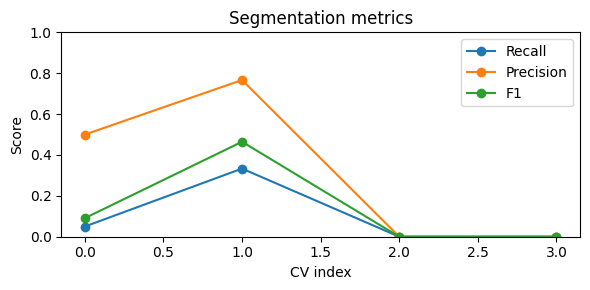

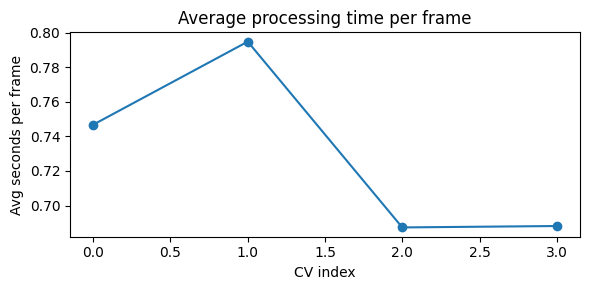

Mean F1: 0.13888888888888887
Mean recall: 0.09583333333333333
Mean precision: 0.31666666666666665


In [16]:
# Plot: test metrics and processing times from Output_Info_All.mat
import os
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

base = suns_config.DATAFOLDER_SETS[suns_config.ACTIVE_EXP_SET]
output_root = os.path.join(base, suns_config.OUTPUT_FOLDER[suns_config.ACTIVE_EXP_SET])
mask_dir = os.path.join(output_root, 'output_masks')
info_path = os.path.join(mask_dir, 'Output_Info_All.mat')
print('Looking for metrics at', info_path)

if os.path.exists(info_path):
    data = loadmat(info_path)
    recall = np.array(data['list_Recall']).squeeze()
    precision = np.array(data['list_Precision']).squeeze()
    f1 = np.array(data['list_F1']).squeeze()
    ttot = np.array(data['list_time'])  # shape (n, 4)
    tframe = np.array(data['list_time_frame'])  # shape (n, 4)

    x = np.arange(recall.size)
    plt.figure(figsize=(6,3))
    plt.plot(x, recall, 'o-', label='Recall')
    plt.plot(x, precision, 'o-', label='Precision')
    plt.plot(x, f1, 'o-', label='F1')
    plt.xlabel('CV index')
    plt.ylabel('Score')
    plt.ylim(0,1)
    plt.title('Segmentation metrics')
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,3))
    plt.plot(x, tframe.mean(axis=1), 'o-')
    plt.xlabel('CV index')
    plt.ylabel('Avg seconds per frame')
    plt.title('Average processing time per frame')
    plt.tight_layout()
    plt.show()

    print('Mean F1:', float(np.nanmean(f1)))
    print('Mean recall:', float(np.nanmean(recall)))
    print('Mean precision:', float(np.nanmean(precision)))
else:
    print('No Output_Info_All.mat found; run test cell first.')


Loading: /gpfs/data/shohamlab/nicole/code/SUNS_nicole/demo/line3_scaled/output_line3_scaled/output_masks/Optimization_Info_9.mat Exists: True
Keys: ['Params_set', 'Params', 'Table', 'Recall_train', 'Precision_train', 'F1_train']
Best Params: {'avgArea': 100.0, 'cons': 1, 'minArea': 17.0, 'thresh_COM': 3.0, 'thresh_COM0': 1.5, 'thresh_IOU': 0.5, 'thresh_consume': 0.75, 'thresh_mask': 0.5, 'thresh_pmap': 130}
Top 10 param combos by F1:
#1: minArea=45, avgArea=100, thresh_pmap=230, cons=7, COM=6.00, IOU=0.50 | Recall=0.000, Precision=0.000, F1=0.000
#2: minArea=25, avgArea=100, thresh_pmap=200, cons=7, COM=3.00, IOU=0.50 | Recall=0.000, Precision=0.000, F1=0.000
#3: minArea=25, avgArea=100, thresh_pmap=200, cons=7, COM=4.50, IOU=0.50 | Recall=0.000, Precision=0.000, F1=0.000
#4: minArea=25, avgArea=100, thresh_pmap=200, cons=6, COM=4.50, IOU=0.50 | Recall=0.000, Precision=0.000, F1=0.000
#5: minArea=25, avgArea=100, thresh_pmap=200, cons=5, COM=4.50, IOU=0.50 | Recall=0.000, Precision=0.0

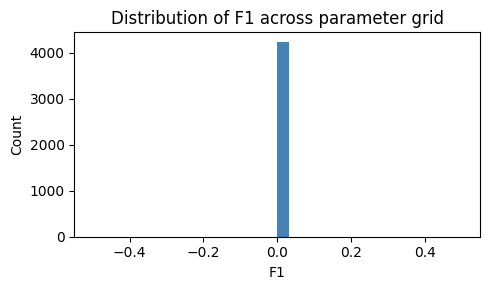

F1_train shape: (9, 11, 11, 5, 7) max: 0.0


In [15]:
# Inspect and visualize Optimization_Info_*.mat (post-processing results)
import os, glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Resolve output dir from active config
base = suns_config.DATAFOLDER_SETS[suns_config.ACTIVE_EXP_SET]
output_root = os.path.join(base, suns_config.OUTPUT_FOLDER[suns_config.ACTIVE_EXP_SET])
mask_dir = os.path.join(output_root, 'output_masks')

# Automatically pick the latest Optimization_Info_*.mat (highest CV index)
cands = sorted(glob.glob(os.path.join(mask_dir, 'Optimization_Info_*.mat')))
opt_path = cands[-1] if cands else os.path.join(mask_dir, 'Optimization_Info_0.mat')
print('Loading:', opt_path, 'Exists:', os.path.exists(opt_path))

if os.path.exists(opt_path):
    # Use squeeze and struct_as_record=False to get friendlier structs
    md = loadmat(opt_path, squeeze_me=True, struct_as_record=False)

    # Summarize keys
    print('Keys:', [k for k in md.keys() if not k.startswith('__')])

    # Show chosen best Params if present
    best_params = md.get('Params', None)
    if best_params is not None:
        try:
            attrs = [a for a in dir(best_params) if not a.startswith('_')]
            best = {a: getattr(best_params, a) for a in attrs}
            print('Best Params:', best)
        except Exception as e:
            print('Could not parse Params:', type(best_params), e)

    # Table columns: [minArea, avgArea, thresh_pmap, cons, thresh_COM, thresh_IOU, Recall, Precision, F1]
    table = md.get('Table', None)
    if table is not None:
        table = np.array(table)
        if table.ndim == 2 and table.shape[1] >= 9:
            order = np.argsort(table[:, -1])[::-1]
            topk = table[order[:10]]
            print('Top 10 param combos by F1:')
            for i, row in enumerate(topk):
                print(f"#{i+1}: minArea={row[0]:.0f}, avgArea={row[1]:.0f}, thresh_pmap={row[2]:.0f}, cons={row[3]:.0f}, COM={row[4]:.2f}, IOU={row[5]:.2f} | Recall={row[6]:.3f}, Precision={row[7]:.3f}, F1={row[8]:.3f}")

            # Quick histogram of F1 distribution
            plt.figure(figsize=(5,3))
            plt.hist(table[:, -1], bins=30, color='steelblue')
            plt.xlabel('F1')
            plt.ylabel('Count')
            plt.title('Distribution of F1 across parameter grid')
            plt.tight_layout()
            plt.show()
        else:
            print('Unexpected Table shape:', table.shape)

    # Also report F1_train array if present
    F1_train = md.get('F1_train', None)
    if F1_train is not None:
        F1_train = np.array(F1_train)
        print('F1_train shape:', F1_train.shape, 'max:', np.max(F1_train))
else:
    print('File not found; no Optimization_Info_*.mat present in', mask_dir)


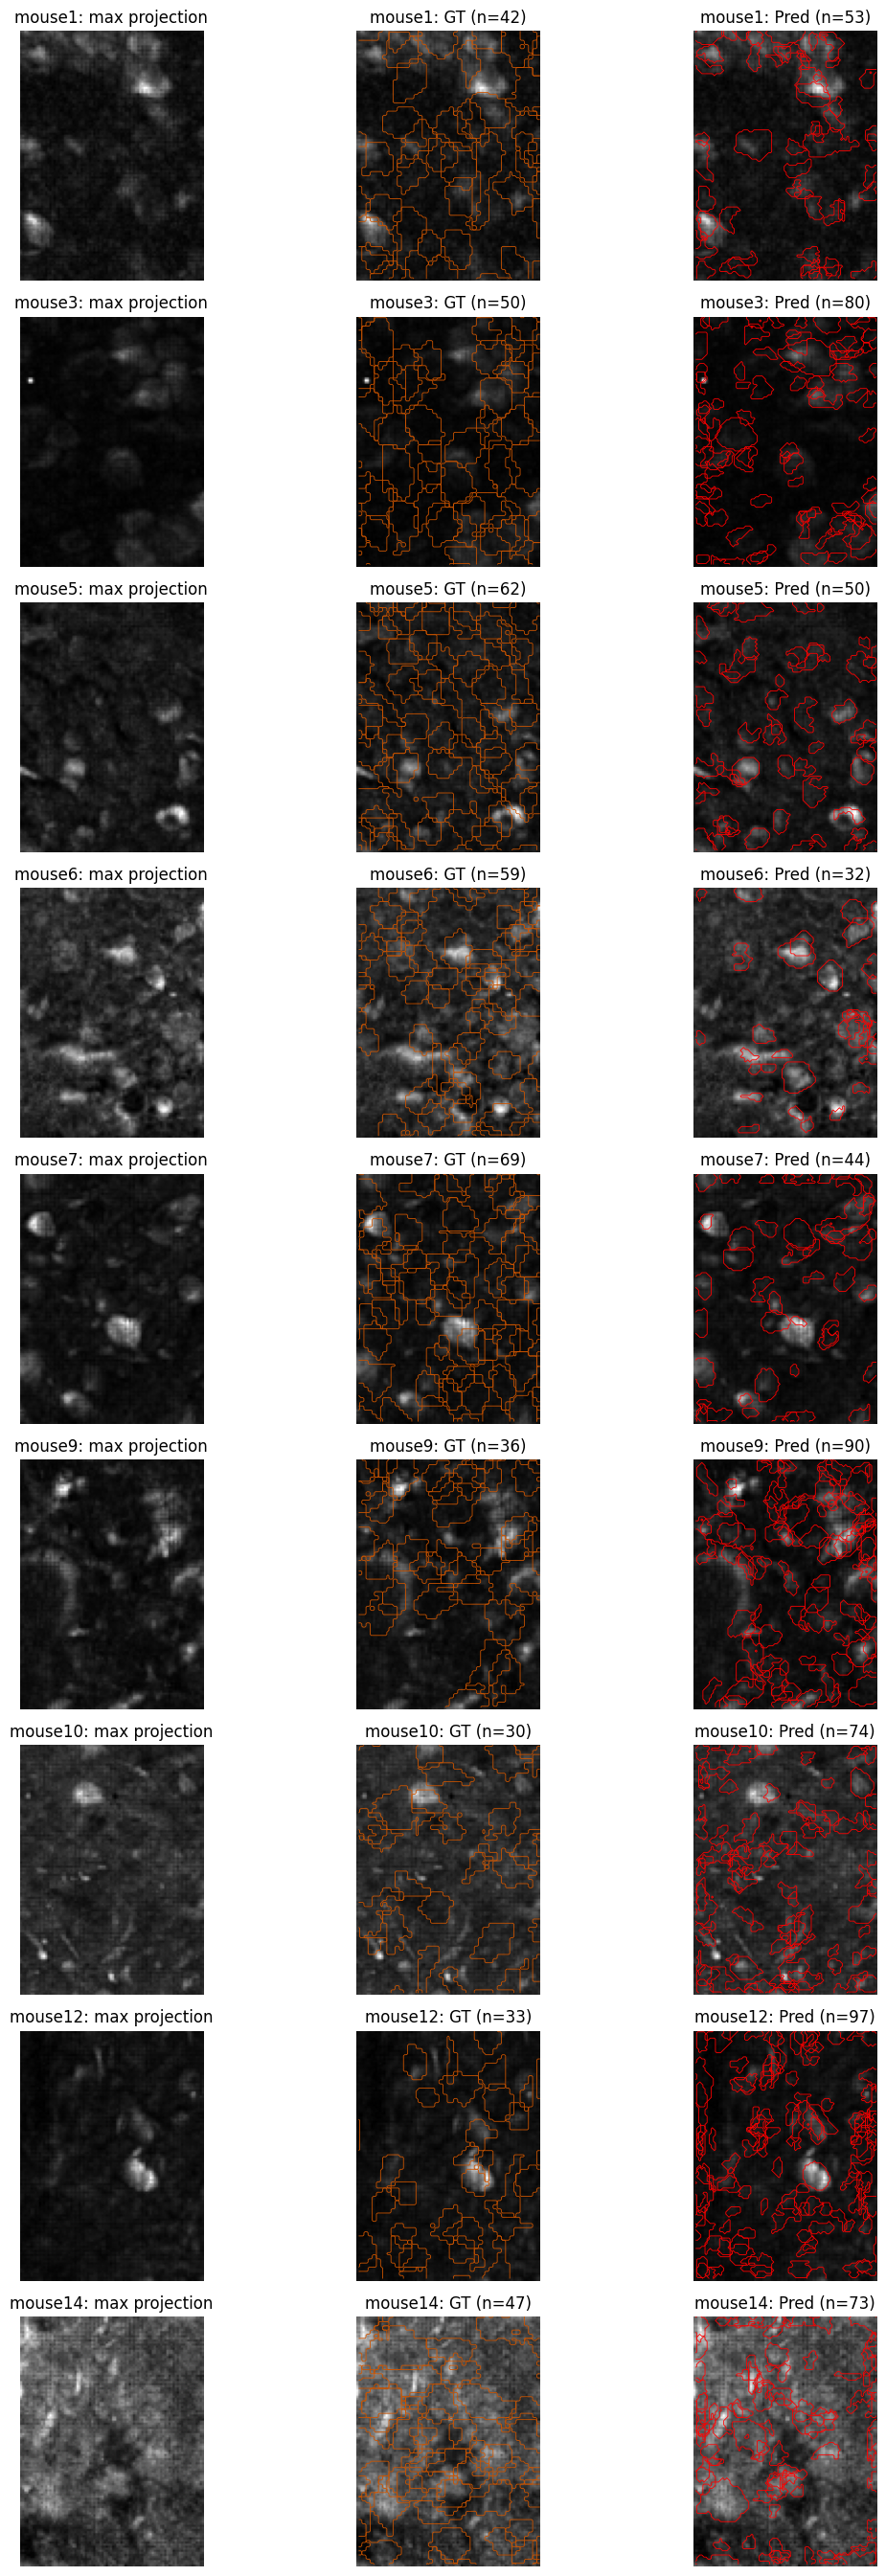

In [21]:
# Visualize training predictions: run model + post-processing with best Params and overlay
# Row per mouse: [MaxProj | GT (white) | Pred (red)]
import os, h5py, numpy as np, matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.sparse import csc_matrix, issparse

base = suns_config.DATAFOLDER_SETS[suns_config.ACTIVE_EXP_SET]
exp_ids = suns_config.EXP_ID_SETS[suns_config.ACTIVE_EXP_SET]
output_root = os.path.join(base, suns_config.OUTPUT_FOLDER[suns_config.ACTIVE_EXP_SET])
net_dir = os.path.join(output_root, 'network_input')
out_dir_default = os.path.join(output_root, 'output_masks')
out_dir_override = "/gpfs/data/shohamlab/nicole/code/SUNS_nicole/demo/line3_scaled/output_line3_scaled/output_masks"
out_dir = out_dir_override if os.path.isdir(out_dir_override) else out_dir_default
train_out_dir = os.path.join(out_dir, 'train')

def get_dims_and_maxproj(net_path: str):
    with h5py.File(net_path, 'r') as hf:
        d = 'network_input' if 'network_input' in hf else list(hf.keys())[0]
        data = hf[d]
        T, rows, cols = data.shape
        mp = None
        for s in range(0, T, 500):
            blk = data[s:min(s+500, T)]
            mx = blk.max(axis=0)
            mp = mx if mp is None else np.maximum(mp, mx)
    return mp, rows, cols

def load_sparse_masks(path: str, pixels: int):
    md = loadmat(path)
    G = md.get('GTMasks_2', None)
    if G is None:
        return None
    S = G if (issparse(G)) else csc_matrix(np.array(G))
    if S.shape[0] == pixels:   return S.tocsc()
    if S.shape[1] == pixels:   return S.transpose().tocsc()
    return S.tocsc()

def load_pred_masks_train(path: str, pixels: int):
    md = loadmat(path, squeeze_me=True, struct_as_record=False)
    M = md.get('Masks_2', md.get('Masks', None))
    if M is None:
        return None
    S = M if (issparse(M)) else csc_matrix(np.array(M))
    if S.shape[1] == pixels:   return S.tocsr()        # (n, pixels)
    if S.shape[0] == pixels:   return S.transpose().tocsr()
    return S.tocsr()

nrows = len(exp_ids)
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(12, 3*nrows))
if nrows == 1:
    axes = np.array([axes])

for i, eid in enumerate(exp_ids):
    ax0, ax1, ax2 = axes[i]
    net_path = os.path.join(net_dir, f"{eid}.h5")
    if not os.path.exists(net_path):
        for ax in (ax0, ax1, ax2):
            ax.axis('off')
        ax0.text(0.5, 0.5, f'{eid}: no network_input', ha='center', va='center')
        continue

    mp, rows, cols = get_dims_and_maxproj(net_path)
    pixels = rows * cols

    # Col 0: max projection
    ax0.imshow(mp, cmap='gray', origin='lower')
    ax0.set_title(f'{eid}: max projection')
    ax0.axis('off')

    # Col 1: GT contours (white)
    ax1.imshow(mp, cmap='gray', origin='lower')
    n_gt = 0
    gt_path = os.path.join(base, 'GT Masks', f'FinalMasks_{eid}_sparse.mat')
    if os.path.exists(gt_path):
        GTp = load_sparse_masks(gt_path, pixels)
        if GTp is not None:
            n_gt = GTp.shape[1]
            for j in range(n_gt):
                gk = (GTp[:, j].toarray().reshape(rows, cols) > 0)
                if gk.any():
                    ax1.contour(gk.astype(float), levels=[0.5], colors=[(0.8, 0.33, 0.0)], linewidths=0.6, origin='lower')
    ax1.set_title(f'{eid}: GT (n={n_gt})')
    ax1.axis('off')

    # Col 2: Pred contours (red)
    ax2.imshow(mp, cmap='gray', origin='lower')
    n_pred = 0
    pred_path = os.path.join(train_out_dir, f'Output_Masks_{eid}_train.mat')
    if os.path.exists(pred_path):
        P = load_pred_masks_train(pred_path, pixels)
        if P is not None:
            n_pred = P.shape[0]
            for j in range(n_pred):
                mk = (P[j, :].toarray().reshape(rows, cols) > 0)
                if mk.any():
                    ax2.contour(mk.astype(float), levels=[0.5], colors=['red'], linewidths=0.6, origin='lower')
    ax2.set_title(f'{eid}: Pred (n={n_pred})')
    ax2.axis('off')

plt.tight_layout(); plt.show()

In [24]:
run_repo_script("demo/train_all_test_all/demo_test_batch.py"
)

Running: /gpfs/home/bizzin01/.conda/envs/tensorflow-2.12/bin/python -u /gpfs/data/shohamlab/nicole/code/SUNS_nicole/demo/train_all_test_all/demo_test_batch.py
2025-10-09 10:45:12.020381: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
importing config
Video  mouse1
2025-10-09 10:45:41.221652: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14784 MB memory:  -> device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:62:00.0, compute capability: 7.0
2025-10-09 10:45:43.092623: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8907
2025-10-09 10:45:43.809016: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot 

RuntimeError: Script failed: /gpfs/data/shohamlab/nicole/code/SUNS_nicole/demo/train_all_test_all/demo_test_batch.py